<a href="https://colab.research.google.com/github/inhyeokJeon/wave/blob/main/run_eqtransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 프로그램 설치

In [ ]:
!git clone git://github.com/smousavi05/EQTransformer.git

Cloning into 'EQTransformer'...
remote: Enumerating objects: 2016, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 2016 (delta 133), reused 149 (delta 75), pack-reused 1768
Receiving objects: 100% (2016/2016), 51.28 MiB | 29.60 MiB/s, done.
Resolving deltas: 100% (1090/1090), done.


In [ ]:
!sudo apt-get update
!sudo apt-get install python
!sudo apt-get install python-dev
!sudo apt-get install python-setuptools
!sudo apt-get install python-numpy
!sudo apt-get install python-numpy-dev
!sudo apt-get install python-scipy
!sudo apt-get install python-matplotlib
!sudo apt-get install python-lxml
!sudo apt-get install python-sqlalchemy
!sudo apt-get install python-suds
!sudo apt-get install ipython

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:12 https://devel

In [ ]:
!git clone git://github.com/obspy/obspy

Cloning into 'obspy'...
remote: Enumerating objects: 118508, done.
remote: Counting objects: 100% (287/287), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 118508 (delta 143), reused 206 (delta 99), pack-reused 118221
Receiving objects: 100% (118508/118508), 102.07 MiB | 29.68 MiB/s, done.
Resolving deltas: 100% (84503/84503), done.


In [ ]:
import sys
sys.path.append('./obspy')

import obspy

- 아래 코드 실행이 완료되면, "RESTART RUNTIME" 수행

In [ ]:
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip uninstall -y keras

!pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.0.0
!pip install keyring>=15.1
!pip install pkginfo>=1.4.2
!pip install h5py==2.10.0
!pip install keras==2.3.1
!pip install tqdm==4.48.0

!pip install EQTransformer --no-dependencies

!pip install obspy

Found existing installation: keras-nightly 2.5.0.dev2021032900
Uninstalling keras-nightly-2.5.0.dev2021032900:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/keras/*
    /usr/local/lib/python3.7/dist-packages/keras_nightly-2.5.0.dev2021032900.dist-info/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.7/dist-packages/keras/applications/resnet50.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/network.py
    /usr/local/lib/python3.7/dist-packages/keras/engine/topology.py
    /usr/local/lib/python3.7/dist-packages/keras/initializers.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/layers/experimental/preprocessing/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/objectives.py
    /usr/local/lib/python3.7/dist-packages/keras/optimizers/__init__.py
    /usr/local/lib/python3.7/dist-packages/keras/optimizers/schedules/__init__.py
    /usr/local/lib/p

# 샘플 데이터 다운로드
- 모델 추론 코드를 실행시키기 위해서는, 추론에 필요한 데이터를 다운로드 해야한다.
- 먼저 데이터를 받아올 station 정보를 담고 있는 station_list.json 파일을 다운로드 받아준다.
- 그런 후 station_list.json에 명시된 station의 지진 정보를 Southern California Earthquake Data Center 혹은 IRIS에서 받아온다.
- 다운로드된 station의 지진정보는 각 station으로 분리되어, output_dir에 저장된다.

In [ ]:
from EQTransformer.utils.downloader import makeStationList
from EQTransformer.utils.downloader import downloadMseeds
import os

json_basepath = os.path.join(os.getcwd(),"json/station_list.json")

makeStationList(json_path=json_basepath, client_list=["SCEDC"], min_lat=35.50, max_lat=35.60, min_lon=-117.80, max_lon=-117.40, start_time="2019-09-01 00:00:00.00", end_time="2019-09-03 00:00:00.00", channel_list=["HH[ZNE]", "HH[Z21]", "BH[ZNE]"], filter_network=["SY"], filter_station=[])

downloadMseeds(client_list=["SCEDC", "IRIS"], stations_json=json_basepath, output_dir="./downloads_mseeds", min_lat=35.50, max_lat=35.60, min_lon=-117.80, max_lon=-117.40, start_time="2019-09-01 00:00:00.00", end_time="2019-09-03 00:00:00.00", chunk_size=1, channel_list=[], n_processor=2)


Using TensorFlow backend.
[2021-08-01 12:28:48,460] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for SCEDC, IRIS.


GS--CA06
GS--CA10
PB--B921
ZY--SV08
####### There are 4 stations in the list. #######


[2021-08-01 12:28:48,672] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 2 client(s): SCEDC, IRIS.
[2021-08-01 12:28:48,678] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:28:48,680] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2021-08-01 12:28:48,680] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:28:48,684] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.


======= Working on CA06 station.
======= Working on CA10 station.


[2021-08-01 12:28:48,904] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.22 seconds)
[2021-08-01 12:28:48,906] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.22 seconds)
[2021-08-01 12:28:48,912] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 1 stations (3 channels).
[2021-08-01 12:28:48,914] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 0 stations (0 channels).
[2021-08-01 12:28:48,919] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - No data available.
[2021-08-01 12:28:48,920] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:28:48,921] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Requesting reliable availability.
[2021-08-01 12:28:48,916] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Will attempt to download data from 1 stations.
[2021-08

** done with --> CA10 -- GS -- 2019-09-01


[2021-08-01 12:28:50,470] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:28:51,037] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:28:51,087] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:28:51,089] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Launching basic QC checks...
[2021-08-01 12:28:51,119] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Downloaded 28.2 MB [13452.24 KB/sec] of data, 0.0 MB of which were discarded afterwards.
[2021-08-01 12:28:51,120] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 3 time intervals/channels after downloading: DOWNLOADED
[2021-08-01 12:28:56,180] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded './downloads_mseedsxml/CA06/GS.CA06.xml'.
[2021-0

** done with --> CA06 -- GS -- 2019-09-01


[2021-08-01 12:29:17,036] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:29:17,039] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2021-08-01 12:29:17,217] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.18 seconds)
[2021-08-01 12:29:17,219] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 0 stations (0 channels).
[2021-08-01 12:29:17,220] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - No data available.
[2021-08-01 12:29:17,221] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:29:17,223] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Requesting reliable availability.
[2021-08-01 12:29:17,412] - obspy.clients.fdsn.mass_downloader - INFO: Client 'IRIS' - Successfully requested availability (0.19 seconds)
[2021-08-01 12:29:17,414] 

** done with --> CA10 -- GS -- 2019-09-02


[2021-08-01 12:29:23,464] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:29:23,465] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2021-08-01 12:29:23,686] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.22 seconds)
[2021-08-01 12:29:23,691] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 1 stations (3 channels).
[2021-08-01 12:29:23,695] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Will attempt to download data from 1 stations.
[2021-08-01 12:29:23,697] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 3 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2021-08-01 12:29:26,538] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:29:26,626] - obspy.clients.fdsn.mass_downloader - INFO: Client

** done with --> CA06 -- GS -- 2019-09-02


[2021-08-01 12:29:42,460] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:29:42,462] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2021-08-01 12:29:42,645] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.18 seconds)


======= Working on B921 station.


[2021-08-01 12:29:42,677] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 1 stations (3 channels).
[2021-08-01 12:29:42,679] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Will attempt to download data from 1 stations.
[2021-08-01 12:29:42,682] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 3 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2021-08-01 12:29:44,827] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:29:45,067] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:29:45,093] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:29:45,094] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Launching basic QC checks...
[2021-08-01 12:29:45,120] - obspy.clients.fdsn.mass_downloader - INFO: Clien

** done with --> B921 -- PB -- 2019-09-01


[2021-08-01 12:29:55,926] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:29:55,927] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2021-08-01 12:29:56,111] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.18 seconds)
[2021-08-01 12:29:56,113] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 1 stations (3 channels).
[2021-08-01 12:29:56,115] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Will attempt to download data from 1 stations.
[2021-08-01 12:29:56,118] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 3 time intervals/channels before downloading: NEEDS_DOWNLOADING


======= Working on SV08 station.


[2021-08-01 12:29:58,212] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:29:58,246] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:29:58,313] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:29:58,314] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Launching basic QC checks...
[2021-08-01 12:29:58,334] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Downloaded 27.3 MB [12799.57 KB/sec] of data, 0.0 MB of which were discarded afterwards.
[2021-08-01 12:29:58,335] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 3 time intervals/channels after downloading: DOWNLOADED
[2021-08-01 12:30:03,358] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded './downloads_mseedsxml/SV08/ZY.SV08.xml'.
[2021-0

** done with --> SV08 -- ZY -- 2019-09-01


[2021-08-01 12:30:18,665] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:30:18,666] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2021-08-01 12:30:18,853] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.18 seconds)
[2021-08-01 12:30:18,881] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 1 stations (3 channels).
[2021-08-01 12:30:18,884] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Will attempt to download data from 1 stations.
[2021-08-01 12:30:18,887] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 3 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2021-08-01 12:30:20,797] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:30:21,288] - obspy.clients.fdsn.mass_downloader - INFO: Client

** done with --> B921 -- PB -- 2019-09-02


[2021-08-01 12:30:29,543] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2021-08-01 12:30:29,544] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Requesting unreliable availability.
[2021-08-01 12:30:29,725] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully requested availability (0.18 seconds)
[2021-08-01 12:30:29,727] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Found 1 stations (3 channels).
[2021-08-01 12:30:29,728] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Will attempt to download data from 1 stations.
[2021-08-01 12:30:29,735] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Status for 3 time intervals/channels before downloading: NEEDS_DOWNLOADING
[2021-08-01 12:30:32,613] - obspy.clients.fdsn.mass_downloader - INFO: Client 'SCEDC' - Successfully downloaded 1 channels (of 1)
[2021-08-01 12:30:32,673] - obspy.clients.fdsn.mass_downloader - INFO: Client

** done with --> SV08 -- ZY -- 2019-09-02


# 샘플 데이터 기준으로 추론
- 모델 추론은 mseed 데이터로 진행할 수도 있고, hdf5 데이터를 대상으로도 진행할 수 있다.
- 아래는 messd 데이터로 추론한 코드이다.

In [ ]:
from EQTransformer.core.mseed_predictor import mseed_predictor
    
mseed_predictor(input_dir='downloads_mseeds',   
                input_model='EQTransformer/ModelsAndSampleData/EqT_model.h5',
                stations_json=json_basepath,
                output_dir='detection_results',
                detection_threshold=0.2,                
                P_threshold=0.1,
                S_threshold=0.1, 
                number_of_plots=10,
                plot_mode='time_frequency',
                batch_size=500,
                overlap=0.3)

08-01 08:29 [INFO] [EQTransformer] Running EqTransformer  0.1.61
08-01 08:29 [INFO] [EQTransformer] *** Loading the model ...
08-01 08:29 [DEBUG] [h5py._conv] Creating converter from 3 to 5


08-01 08:29 [WARNING] [tensorflow] Layer lstm_1 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_1 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_1 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_2 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_2 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_2 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_3 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_3 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_3 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_4 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.


08-01 08:29 [WARNING] [tensorflow] Layer lstm_5 will not use cuDNN kernels since it doesn't meet the criteria. It will use a generic GPU kernel as fallback when running on GPU.
08-01 08:29 [INFO] [EQTransformer] *** Loading is complete!
08-01 08:29 [INFO] [EQTransformer] There are files for 3 stations in downloads_mseeds directory.
08-01 08:29 [INFO] [EQTransformer] Started working on B921, 1 out of 3 ...
08-01 08:29 [INFO] [EQTransformer] 20190901T000000Z__20190902T000000Z.mseed
08-01 08:30 [DEBUG] [matplotlib.font_manager] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
08-01 08:30 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
08-01 08:30 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
08-01 08:30 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'cmr10'

08-01 08:30 [INFO] [EQTransformer] Finished the prediction in: 0 hours and 0 minutes and 56.84 seconds.
08-01 08:30 [INFO] [EQTransformer] *** Detected: 2926 events.
08-01 08:30 [INFO] [EQTransformer]  *** Wrote the results into --> " /content/detection_results/B921_outputs "
08-01 08:30 [INFO] [EQTransformer] Started working on CA06, 2 out of 3 ...
08-01 08:30 [INFO] [EQTransformer] 20190901T000000Z__20190902T000000Z.mseed
08-01 08:30 [INFO] [EQTransformer] 20190902T000000Z__20190903T000000Z.mseed


08-01 08:30 [INFO] [EQTransformer] Finished the prediction in: 0 hours and 0 minutes and 19.27 seconds.
08-01 08:30 [INFO] [EQTransformer] *** Detected: 2880 events.
08-01 08:30 [INFO] [EQTransformer]  *** Wrote the results into --> " /content/detection_results/CA06_outputs "
08-01 08:30 [INFO] [EQTransformer] Started working on SV08, 3 out of 3 ...
08-01 08:30 [INFO] [EQTransformer] 20190901T000000Z__20190902T000000Z.mseed
08-01 08:31 [INFO] [EQTransformer] 20190902T000000Z__20190903T000000Z.mseed


08-01 08:31 [INFO] [EQTransformer] Finished the prediction in: 0 hours and 0 minutes and 17.22 seconds.
08-01 08:31 [INFO] [EQTransformer] *** Detected: 1686 events.
08-01 08:31 [INFO] [EQTransformer]  *** Wrote the results into --> " /content/detection_results/SV08_outputs "


<Figure size 720x720 with 0 Axes>

# 추론 결과 시각화
- 추론 코드를 실행하고 나면, time_tracks.pkl 파일이 생성된다.
- time_tracks.pkl파일에는 시간에 따른 데이터의 구성정보가 들어있어, 데이터의 연결성이나 데이터 형태를 시각화해서 볼 수 있다.
- 아래는 time_tracks.pkl 파일을 시각화한 결과이다.

08-01 08:31 [DEBUG] [matplotlib.pyplot] Loaded backend module://ipykernel.pylab.backend_inline version unknown.
08-01 08:31 [DEBUG] [matplotlib.font_manager] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.33.
08-01 08:31 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
08-01 08:31 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
08-01 08:31 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
08-01 08:31 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
08-01 08:31 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
08-01 08:31 [DEBUG] [matplotlib.font_manager] 

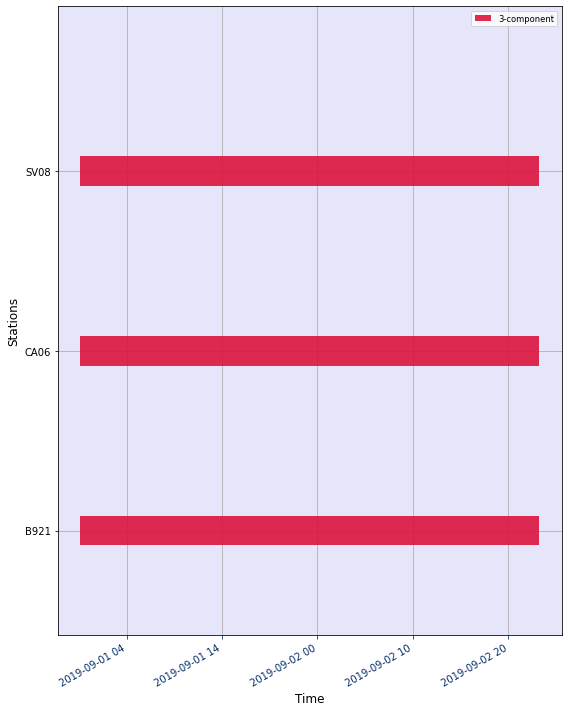

In [ ]:
%matplotlib inline
from EQTransformer.utils.plot import plot_data_chart

plot_data_chart('time_tracks.pkl', time_interval=10)

- 아래는 특정 날의 raw data를 시각화한 것이다.

08-01 08:32 [DEBUG] [matplotlib.font_manager] findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0.
08-01 08:32 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
08-01 08:32 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal 700 normal>) = 10.335
08-01 08:32 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
08-01 08:32 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
08-01 08:32 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
08-01 08:32 [DEBUG] [matplotlib.font_manager] findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
08-01 08:3

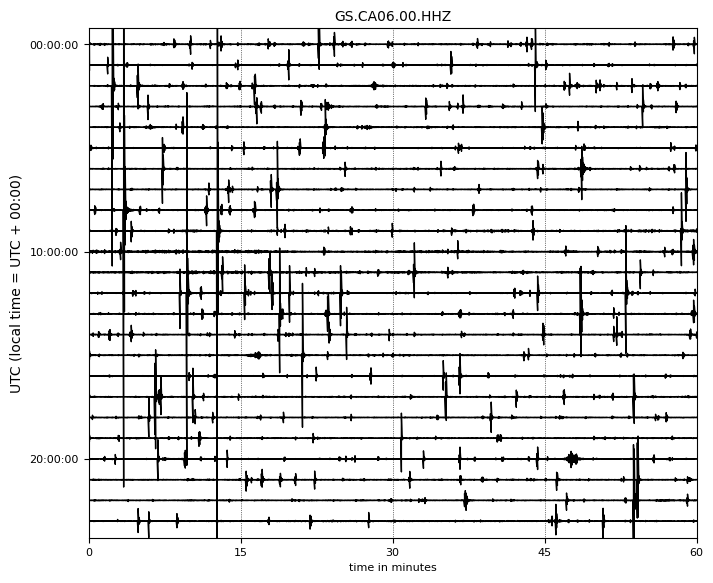

In [ ]:
from EQTransformer.utils.plot import plot_detections, plot_helicorder

plot_helicorder(input_mseed='downloads_mseeds/CA06/GS.CA06.00.HHZ__20190902T000000Z__20190903T000000Z.mseed', input_csv=None)

- 그리고 이렇게 시각화된 raw data와 추론 결과를 합성하여 볼수 있다.

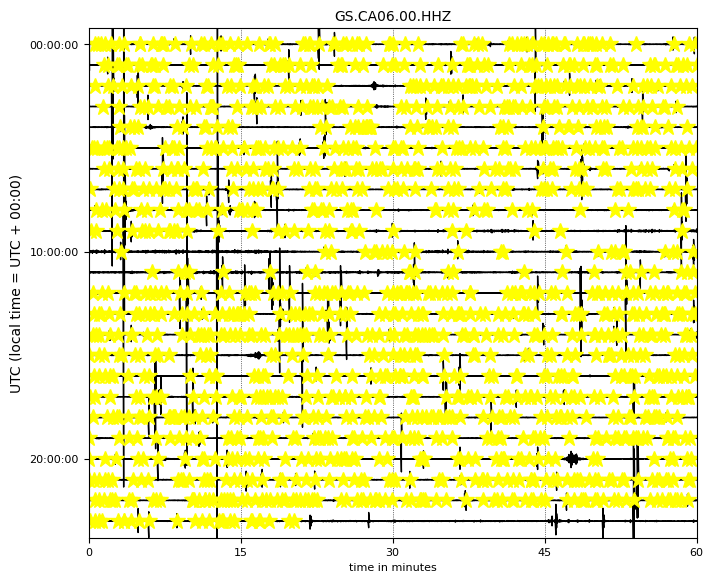

In [ ]:
plot_helicorder(input_mseed='downloads_mseeds/CA06/GS.CA06.00.HHZ__20190902T000000Z__20190903T000000Z.mseed', input_csv='detection_results/CA06_outputs/X_prediction_results.csv')

- 각 지역별 detection 결과를 다음과 같이 시각화 할 수 있다.

08-01 08:33 [DEBUG] [matplotlib.colorbar] locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fdf85c8a8d0>
08-01 08:33 [DEBUG] [matplotlib.colorbar] Using auto colorbar locator on colorbar
08-01 08:33 [DEBUG] [matplotlib.colorbar] locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fdf85c8a8d0>
08-01 08:33 [DEBUG] [matplotlib.colorbar] Setting pcolormesh
08-01 08:33 [DEBUG] [matplotlib.figure] Executing constrainedlayout
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] LayoutBox: gridspec000000.ss000001.ax000002, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] left 0.104260
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] right 0.049581
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bottom 0.180166
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bbox.y0 -0.044748
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] pos.y0 0.125000
08-01 08:33 [DEBUG] [matplotlib._constrained_layout]

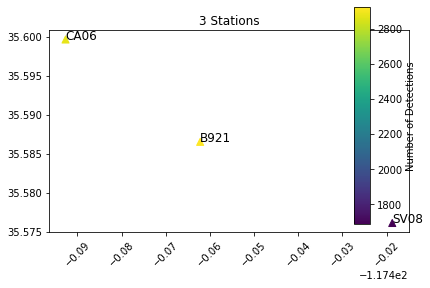

In [ ]:
plot_detections(input_dir='detection_results', input_json=json_basepath, plot_type='station_map', marker_size=50)

- 각 지역별 detection 결과를 histogram 형식으로도 다음과 같이 시각화할 수 있다.

08-01 08:33 [DEBUG] [matplotlib.figure] Executing constrainedlayout
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] LayoutBox: gridspec000003.ss000004.ax000005, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] left 0.099908
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] right 0.006945
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bottom 0.296008
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bbox.y0 -0.160590
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] pos.y0 0.125000
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] LayoutBox: gridspec000003.ss000004.ax000005, (left: 0.000) (bot: 0.000) (right: 1.000)  (top: 1.000) 
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] left 0.099908
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] right 0.006945
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bottom 0.296008
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bbox.y0 0.010418
08-0

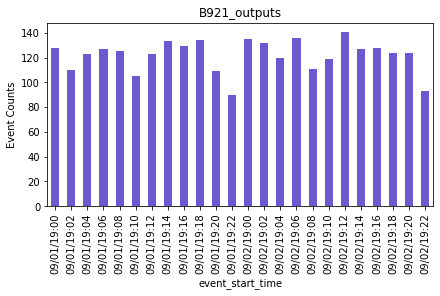

08-01 08:33 [DEBUG] [matplotlib.figure] Executing constrainedlayout
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] LayoutBox: gridspec000006.ss000007.ax000008, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] left 0.099908
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] right 0.006945
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bottom 0.296008
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bbox.y0 -0.160590
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] pos.y0 0.125000
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] LayoutBox: gridspec000006.ss000007.ax000008, (left: 0.000) (bot: 0.000) (right: 1.000)  (top: 1.000) 
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] left 0.099908
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] right 0.006945
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bottom 0.296008
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bbox.y0 0.010418
08-0

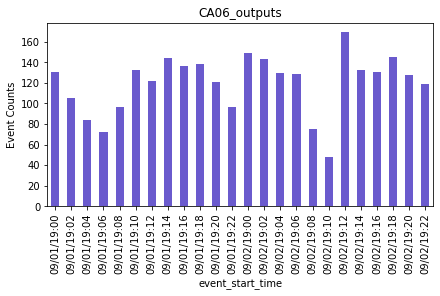

08-01 08:33 [DEBUG] [matplotlib.figure] Executing constrainedlayout
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] LayoutBox: gridspec000009.ss000010.ax000011, (left: 0.000) (bot: 0.000) (right: 0.000)  (top: 0.000) 
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] left 0.099908
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] right 0.006945
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bottom 0.296008
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bbox.y0 -0.160590
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] pos.y0 0.125000
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] LayoutBox: gridspec000009.ss000010.ax000011, (left: 0.000) (bot: 0.000) (right: 1.000)  (top: 1.000) 
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] left 0.099908
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] right 0.006945
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bottom 0.296008
08-01 08:33 [DEBUG] [matplotlib._constrained_layout] bbox.y0 0.010418
08-0

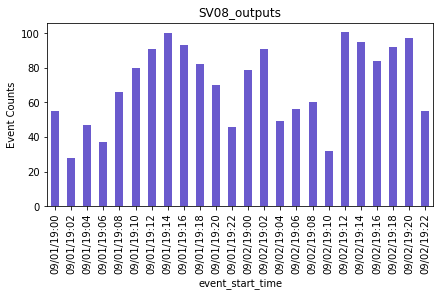

In [ ]:
plot_detections(input_dir='detection_results', input_json=json_basepath, plot_type='hist', time_window=120)

# 모델 수정
- 아래 trainer에 들어가는 모델 파라미터를 수정하면, 수정된 모델이 만들어지고, 해당 모델이 지정한 데이터로 학습된다. 그리고 최종 학습된 모델이 파일로 생성된다.
- 샘플로 제공된 100개 데이터를 사용하여, 새롭게 정의한 모델을 학습한다.
- 원래는 대용량의 hdf5 파일을 대상으로 학습해야하나, 대용량 데이터를 학습에 쓸 수 없으므로 샘플 데이터를 사용한다.

Learning rate:  0.001
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 6000, 3)      0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 6000, 8)      272         input[0][0]                      
__________________________________________________________________________________________________
max_pooling1d_1 (MaxPooling1D)  (None, 3000, 8)      0           conv1d_1[0][0]                   
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 3000, 16)     1168        max_pooling1d_1[0][0]            
______________________________________________________________________

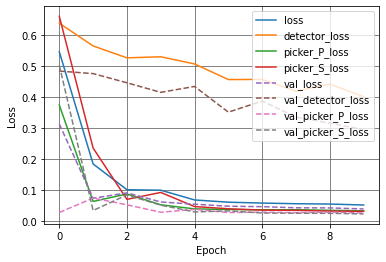

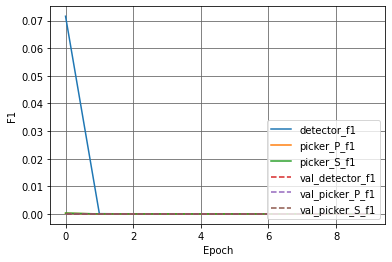

In [ ]:
from EQTransformer.core.trainer import trainer

hdf5_path = './EQTransformer/ModelsAndSampleData/100samples.hdf5'
csv_path = './EQTransformer/ModelsAndSampleData/100samples.csv'

trainer(input_hdf5=hdf5_path,
        input_csv=csv_path,
        output_name='test_trainer',                
        cnn_blocks=2,
        lstm_blocks=1,
        padding='same',
        activation='relu',
        drop_rate=0.2,
        label_type='gaussian',
        add_event_r=0.6,
        add_gap_r=0.2,
        shift_event_r=0.9,
        add_noise_r=0.5, 
        mode='generator',
        train_valid_test_split=[0.60, 0.20, 0.20],
        batch_size=20,
        epochs=10, 
        patience=2,
        gpuid=None,
        gpu_limit=None)



- 수정한 모델의 성능을 샘플 데이터로 평가한다.

Loading the model ...
Loading is complete!
Testing ...
Writting results into: " test_tester_outputs "


100%|██████████| 2/2 [00:05<00:00,  2.69s/it]


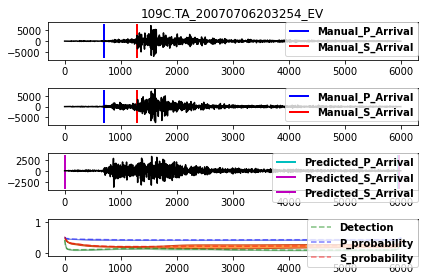

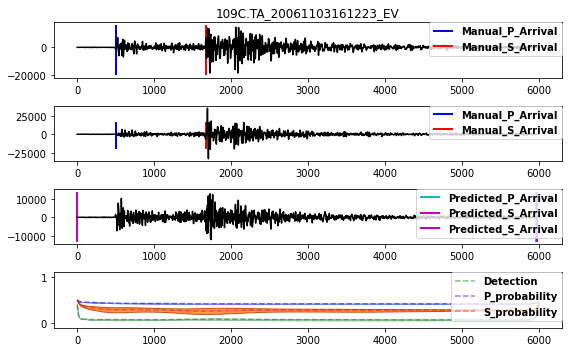

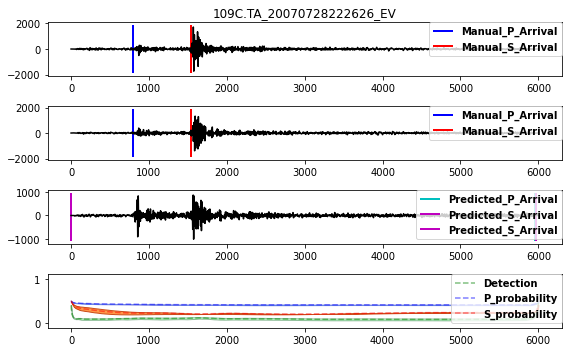

In [ ]:
from EQTransformer.core.tester import tester

hdf5_path = './EQTransformer/ModelsAndSampleData/100samples.hdf5'
csv_path = './EQTransformer/ModelsAndSampleData/100samples.csv'

tester(input_hdf5='./EQTransformer/ModelsAndSampleData/100samples.hdf5',
       input_testset='test_trainer_outputs/test.npy',
       input_model='test_trainer_outputs/models/test_trainer_001.h5',
       output_name='test_tester',
       detection_threshold=0.20,                
       P_threshold=0.1,
       S_threshold=0.1, 
       number_of_plots=3,
       estimate_uncertainty=True, 
       number_of_sampling=2,
       input_dimention=(6000, 3),
       normalization_mode='std',
       mode='generator',
       batch_size=10,
       gpuid=None,
       gpu_limit=None)